<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/linear_algebra/pca_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA) – From First Principles

Goal:
- Understand PCA as variance maximization
- Derive covariance matrix
- Compute eigen decomposition
- Implement PCA manually


In [1]:
import numpy as np
import matplotlib.pyplot as plt

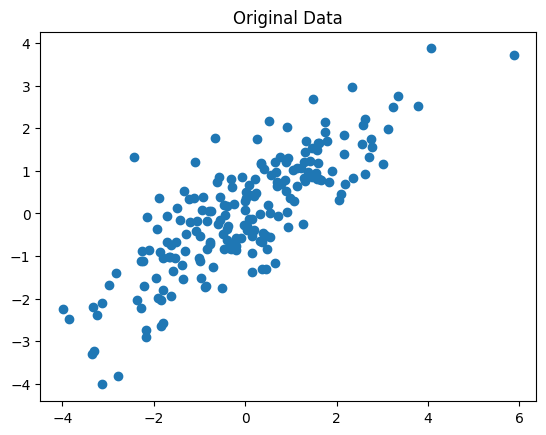

In [2]:
np.random.seed(42)

mean = [0, 0]
cov = [[3, 2],
       [2, 2]]

X = np.random.multivariate_normal(mean, cov, 200)

plt.scatter(X[:,0], X[:,1])
plt.title("Original Data")
plt.show()

In [3]:
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

print("Mean after centering:", np.mean(X_centered, axis=0))

Mean after centering: [-8.8817842e-18  4.5519144e-17]


In [4]:
cov_matrix = np.cov(X_centered.T)
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[2.7186379  1.84079041]
 [1.84079041 1.87427921]]


In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [4.18504129 0.40787583]
Eigenvectors:
 [[ 0.78215821 -0.62307987]
 [ 0.62307987  0.78215821]]


In [6]:
idx = np.argsort(eigenvalues)[::-1]

eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Sorted Eigenvalues:", eigenvalues)

Sorted Eigenvalues: [4.18504129 0.40787583]


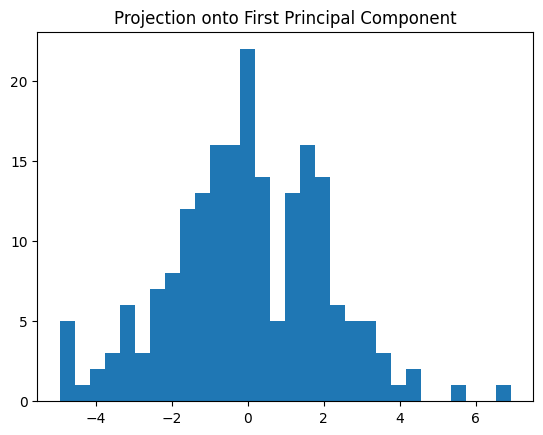

In [7]:
W = eigenvectors[:, 0]  # First principal component

X_pca = X_centered @ W

plt.hist(X_pca, bins=30)
plt.title("Projection onto First Principal Component")
plt.show()

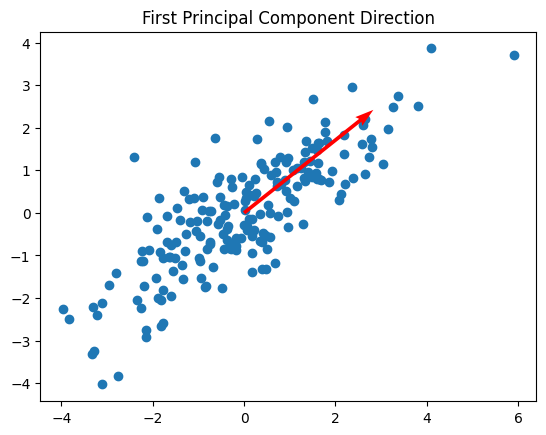

In [8]:
plt.scatter(X_centered[:,0], X_centered[:,1])
plt.quiver(0, 0, W[0], W[1], scale=3, color='red')
plt.title("First Principal Component Direction")
plt.show()

## What is PCA?

PCA finds the direction of maximum variance in data.

It does this by:

1. Centering the data
2. Computing covariance matrix
3. Finding eigenvectors of covariance
4. Selecting eigenvector with largest eigenvalue

---

## Why Do Eigenvalues Matter?

Eigenvalues represent variance magnitude along eigenvector directions.

Largest eigenvalue = most informative direction.

---

## PCA via SVD

Instead of covariance eigen decomposition,
we can compute SVD directly on centered data matrix.

This is numerically more stable.

PCA and SVD are deeply connected.


In [9]:
U, S, Vt = np.linalg.svd(X_centered)

print("Singular values:", S[:2])

Singular values: [28.85867661  9.00928912]
